In [47]:
import numpy as np
import scipy as sp
import networkx as nx
import matplotlib.pyplot as plt
from itertools import count
import seaborn as sns

from networkx import karate_club_graph, to_numpy_matrix

In [101]:
zkc = karate_club_graph()
order = sorted(list(zkc.nodes()))
A = to_numpy_matrix(zkc, nodelist=order)
I = np.eye(zkc.number_of_nodes())
A_hat = A + I
D_hat = np.array(np.sum(A_hat, axis=0))[0]
D_hat = np.matrix(np.diag(D_hat))

# Initialize weights randomly
W_1 = np.random.normal(
    loc=0, scale=1, size=(zkc.number_of_nodes(), 4))
W_2 = np.random.normal(
    loc=0, size=(W_1.shape[1], 2))

# Stack layers
def relu(x):
    return np.maximum(x, 0)

def gcn_layer(A_hat, D_hat, X, W):
    return relu(D_hat**-1 * A_hat * X * W)
H_1 = gcn_layer(A_hat, D_hat, I, W_1)
H_2 = gcn_layer(A_hat, D_hat, H_1, W_2)
output = H_2

# Extract feature representations
feature_representations = {
    node: np.array(output)[node] 
    for node in zkc.nodes()}

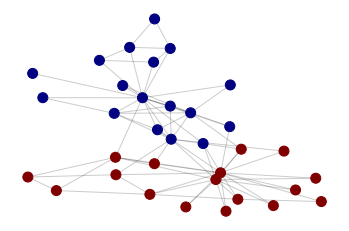

In [102]:
clubs = set(nx.get_node_attributes(zkc,'club').values())
mapping = dict(zip(sorted(clubs),count()))
nodes = zkc.nodes()
colors = [mapping[zkc.nodes[n]['club']] for n in nodes]

pos = nx.spring_layout(zkc)
ec = nx.draw_networkx_edges(zkc, pos, alpha=0.2)
nc = nx.draw_networkx_nodes(zkc, pos, nodelist=nodes, node_color=colors, 
                            with_labels=False, node_size=100, cmap=plt.cm.jet)
plt.axis('off')
plt.show()

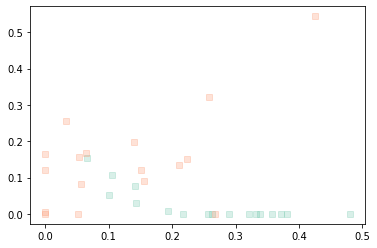

In [103]:
c = sns.color_palette(palette='Set2')
fig = plt.figure()
for node, feat in feature_representations.items():
    plt.plot(feat[0], feat[1], 's', c=c[colors[node]], alpha=0.25)